## **<금융, 보험 용어 특화 한-영 번역 알고리즘>**

- 데이터 통계(AI 허브 일상생활 및 구어체 한-영 번역 병렬 말뭉치 데이터)
https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=71265

데이터는 상황별 신조어, 약어, 은어, 관용적 의미와 어투가 반영되어 아래 표와 같이 150만개의 문장으로 구성되어 있으며, 그 중에서 본 프로젝트를 위해 "일상생활" 분야에서 약 45만개의 문장과 "금융, 보험" 분야에서 약 5만개의 문장을 사용하였다.

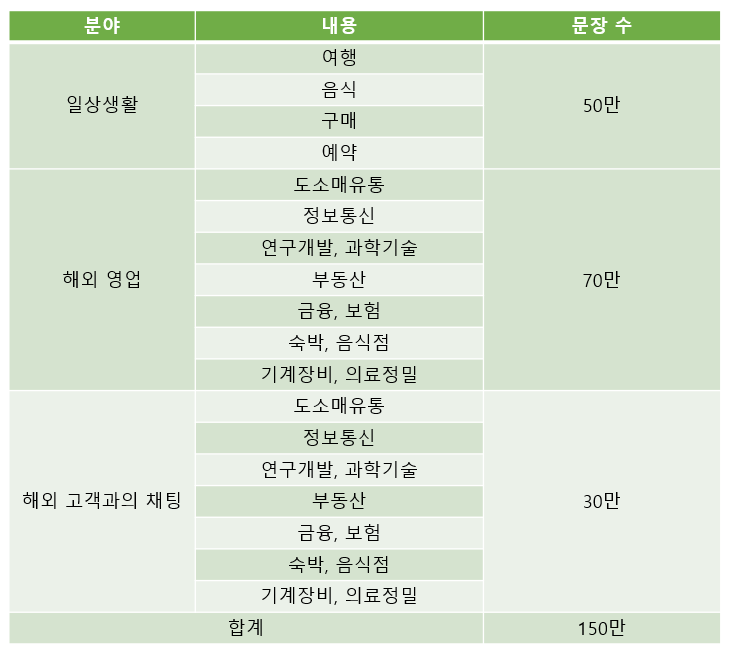

- 파일명(임의로 변경): data.JSON

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import pandas as pd
from glob import glob
from tqdm import tqdm # 진행 상황 업데이트
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path= './drive/MyDrive/data.json'

In [4]:
# JSON 파일 읽기
with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 데이터 프레임으로 변환
df = pd.DataFrame(data['data'])


In [5]:
df

,sn,data_set,domain,subdomain,en_original,en,mt,ko,source_language,target_language,word_count_ko,word_count_en,word_ratio,file_name,source,license,style,included_unknown_words,ner
0,ECOAR1A00003,일상생활및구어체,해외고객과의채팅,"숙박,음식점","I'm glad to hear that, and I hope you do consi...","I'm glad to hear that, and I hope you do consi...",그 소식을 들으니 기쁩니다. 우리와 거래하는 것을 고려해 보시기 바랍니다.,"그 말을 들으니 기쁘고, 저희와 거래하는 것을 고려해 주셨으면 합니다.",en,ko,10.0,15.0,0.667,"해외고객과의채팅_숙박,음식점.xlsx",크라우드 소싱,open,구어체,False,None
1,ECOAR1A00004,일상생활및구어체,해외고객과의채팅,"숙박,음식점","I'm definitely thinking about it, but I have s...","I'm definitely thinking about it, but I have s...",확실히 생각하고 있지만 몇 가지 질문이 있습니다.,"확실히 생각하고 있습니다만, 몇 가지 여쭤보고 싶은 게 있어요.",en,ko,9.0,13.0,0.692,"해외고객과의채팅_숙박,음식점.xlsx",크라우드 소싱,open,구어체,False,None
2,ECOAR1A00009,일상생활및구어체,해외고객과의채팅,"숙박,음식점","In today's world, one in every five families h...","In today's world, one in every five families h...",오늘날의 세계에서는 5가구 중 1가구는 고양이나 개 또는 둘 다를 키우고 있습니다.,오늘날 세계 5가구 중 1가구는 고양이나 개 또는 둘 다를 키우고 있습니다.,en,ko,12.0,15.0,0.800,"해외고객과의채팅_숙박,음식점.xlsx",크라우드 소싱,open,구어체,False,None
3,ECOAR1A00016,일상생활및구어체,해외고객과의채팅,"숙박,음식점","When you tell them, we'll take care of their c...","When you tell them, we'll take care of their c...","당신이 그들에게 말할 때, 우리는 그들의 아이를 돌볼 것입니다.","그들에게 말하면, 저희가 그 아이들을 돌볼 것입니다.",en,ko,7.0,10.0,0.700,"해외고객과의채팅_숙박,음식점.xlsx",크라우드 소싱,open,구어체,False,None
4,ECOAR1A00027,일상생활및구어체,해외고객과의채팅,"숙박,음식점","OK, how about for swimming?","OK, how about for swimming?","좋아, 수영은 어때?","좋아요, 수영은 어떤가요?",en,ko,3.0,5.0,0.600,"해외고객과의채팅_숙박,음식점.xlsx",크라우드 소싱,open,구어체,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200302,EISWR2L297807,일상생활및구어체,해외영업,도소매유통,It is waterproof and supports various scenarios.,It is waterproof and supports various scenarios.,방수가 되며 다양한 시나리오를 지원합니다.,방수 기능이 제공되며 다양한 시나리오를 지원합니다.,en,ko,6.0,7.0,0.857,해외영업_도소매유통.xlsx,크라우드 소싱,open,구어체,False,None
1200303,EISWR2L297808,일상생활및구어체,해외영업,도소매유통,It can automatically recognize your swimming p...,It can automatically recognize your swimming p...,"수영 자세를 자동으로 인식하여 회사, 속도, 칼로리 소모량 등의 데이터를 기록할 수...","수영 자세를 자동으로 인식하고 회사, 속도 또는 칼로리 소비와 같은 데이터를 기록할...",en,ko,14.0,17.0,0.824,해외영업_도소매유통.xlsx,크라우드 소싱,open,구어체,False,None
1200304,EISWR2L297811,일상생활및구어체,해외영업,도소매유통,Provides 14 days of battery life.,Provides 14 days of battery life.,14일의 배터리 수명을 제공합니다.,14일간의 배터리 수명을 제공합니다.,en,ko,4.0,6.0,0.667,해외영업_도소매유통.xlsx,크라우드 소싱,open,구어체,False,None
1200305,EISWR2L297812,일상생활및구어체,해외영업,도소매유통,Thanks to the aircraft-grade aluminum alloy bo...,Thanks to the aircraft-grade aluminum alloy bo...,항공기 등급의 알루미늄 합금 본체 덕분에 스마트워치는 얇고 가벼우며 편안한 착용감을...,스마트 워치는 항공기 등급의 알루미늄 합금 바디 덕분에 얇고 가벼워 착용감이 우수합니다.,en,ko,12.0,17.0,0.706,해외영업_도소매유통.xlsx,크라우드 소싱,open,구어체,False,None


In [6]:
# domain 행의 "일상생활" 열에서 "ko"와 "en" 추출
df2 = df.loc[df['domain'] == "일상생활", ['domain', 'ko', 'en']]

In [7]:
df2

,domain,ko,en
30085,일상생활,저는 기내식 별로 안 좋아해요.,I really don't like airplane food.
30086,일상생활,스테이크가 항상 눅눅해요.,The steaks are always really soggy.
30087,일상생활,저도 빵을 안 좋아해요.,I also don't like bread.
30088,일상생활,파스타 먹을 것 같아요.,I think I'll go for the pasta.
30089,일상생활,"그래서, 식사는 두 번, 야식은 한 번 제공됩니다.","Therefore, we will serve you two proper meals ..."
...,...,...,...
790183,일상생활,"여행 보험은 잃은 금액에 대해서만 상환되므로, 선불 및 환불되지 않는 비용만 보상합니다.",Note that travel insurance will only cover pre...
790184,일상생활,"마지막으로, 구매하시기 전에 방침을 비교해 보시는 게 좋습니다.","Lastly, I advise you to compare plans before p..."
790185,일상생활,"대부분의 방침도 이와 유사하며, 여행 취소는 최대 100%이며 여행 중단은 선불로 ...","Most plans will be similar, with trip cancelat..."
790186,일상생활,"여행 보험이 특히 장거리 여행에 도움이 된다는 걸 알게 되었기에, 다시 한번 설명해...","Thank you again for explaining everything, as ..."


In [8]:
# subdomain행의 "금융,보험"열에서 "ko"와 "en" 추출
df3 = df.loc[df['subdomain'] == "금융,보험", ['domain', 'subdomain', 'ko', 'en']]

In [9]:
df3

,domain,subdomain,ko,en
2049,해외고객과의채팅,"금융,보험",투자는 100만 달러 이상부터 시작합니다.,The investment starts from one million dollars...
2050,해외고객과의채팅,"금융,보험",투자수익률로 500만 달러짜리 걸로 하겠습니다.,I will choose the one with five million for th...
2051,해외고객과의채팅,"금융,보험","네, 그게 바로 저희가 여기 온 이유죠.","Yes, that's exactly what we're here for."
2052,해외고객과의채팅,"금융,보험",수십 년 동안 저희와 함께해 온 고객도 몇 명 있습니다.,Several of our customers have been with us for...
2053,해외고객과의채팅,"금융,보험","주식, 선물, 환거래가 차질없이 잘 되고 있습니다.","Stock, futures, and exchange transactions have..."
...,...,...,...,...
861950,해외영업,"금융,보험",특히 주식 시장이 하락할 때 그렇습니다.,That's especially when the stock market goes d...
861951,해외영업,"금융,보험","글쎄, 이제 나는 동전의 양면을 압니다.","Well, now I know the two sides of a coin."
861952,해외영업,"금융,보험",내가 은행 투자를 배울 차례입니다.,It's my turn to learn banking investments.
861953,해외영업,"금융,보험",아주 좋은 대화였습니다!,This was a very good conversation!


In [10]:
df4 = pd.concat([df2, df3], axis=0)

In [11]:
df4

,domain,ko,en,subdomain
30085,일상생활,저는 기내식 별로 안 좋아해요.,I really don't like airplane food.,NaN
30086,일상생활,스테이크가 항상 눅눅해요.,The steaks are always really soggy.,NaN
30087,일상생활,저도 빵을 안 좋아해요.,I also don't like bread.,NaN
30088,일상생활,파스타 먹을 것 같아요.,I think I'll go for the pasta.,NaN
30089,일상생활,"그래서, 식사는 두 번, 야식은 한 번 제공됩니다.","Therefore, we will serve you two proper meals ...",NaN
...,...,...,...,...
861950,해외영업,특히 주식 시장이 하락할 때 그렇습니다.,That's especially when the stock market goes d...,"금융,보험"
861951,해외영업,"글쎄, 이제 나는 동전의 양면을 압니다.","Well, now I know the two sides of a coin.","금융,보험"
861952,해외영업,내가 은행 투자를 배울 차례입니다.,It's my turn to learn banking investments.,"금융,보험"
861953,해외영업,아주 좋은 대화였습니다!,This was a very good conversation!,"금융,보험"


In [12]:
source_dataset = list(df4['ko'])
target_dataset = list(df4['en'])

In [13]:
source_dataset

['저는 기내식 별로 안 좋아해요.',
 '스테이크가 항상 눅눅해요.',
 '저도 빵을 안 좋아해요.',
 '파스타 먹을 것 같아요.',
 '그래서, 식사는 두 번, 야식은 한 번 제공됩니다.',
 '다른 건 뭔가요?',
 '저는 기내식을 즐겨 먹습니다.',
 '심지어 기대되기까지 합니다.',
 '생선이 좋을 것 같습니다.',
 '알겠습니다, 이 FFF1으로 하겠습니다.',
 '지금은 그것으로 충분하십니까, 손님?',
 '기내식은 비행 당일에 만들어집니다.',
 '실제로는 공장에서 만들어집니다.',
 '매일 수천 파운드의 음식이 만들어집니다.',
 '그들은 끊임없이 새로운 요리법을 시도하고 있습니다.',
 '아무도 그런 고통을 겪지 않기를 바랍니다.',
 '기장과 부기장이 같은 식사를 하지 않도록 그렇게 만든 거에요.',
 '비행기 시간에 거의 늦었어요.',
 '하지만 이미 승객들을 부르고 있네요.',
 '도와주셔서 정말 감사합니다.',
 '나도 온라인에서 같은 내용을 읽었어!',
 '이 항공사를 10년 동안 이용했어요.',
 '이 비행기에서는 수돗물을 제공하지 않습니다.',
 '메인 코스는 스파게티였지요.',
 '정말 맛있었는데, 어디에서 하늘에서는 음식의 맛이 달라진다는 글을 본 적이 있어요.',
 '네가 선택한 음식은 어때?',
 '사실, 나는 이코노미석에서는 음식을 데워줄 뿐이라고 생각해.',
 '아, 인덕션일 수 있지 않을까?',
 '그럼 라면을 꼭 주문해야겠어!',
 '원하시는대로 메뉴를 선택하셔도 안전합니다.',
 '오늘은 닭고기와 생선입니다.',
 '많은 사람들은 승무원이 물어볼 때만 음식을 선택합니다.',
 '하지만 저는 비행기를 타기 전에 항상 음식을 선택합니다.',
 '오늘의 식사는 무엇입니까?',
 '따듯하지 않아서 먹을 수가 없어요.',
 '모든 항공편에는 간식과 음료가 포함되어 있습니다.',
 '다양한 요리를 즐겨보세요!',
 '저는 닭고기와 얼음을 곁들인 탄산음료로 주세요.',
 '그럼 우리 둘 다 치킨으로 해주세요, 감사합니다.',

In [14]:
target_dataset

["I really don't like airplane food.",
 'The steaks are always really soggy.',
 "I also don't like bread.",
 "I think I'll go for the pasta.",
 'Therefore, we will serve you two proper meals and one late-night meal.',
 'What is the other option?',
 'I enjoy eating airplane food.',
 'I have even come to look forward to it.',
 'I would like to have fish.',
 'OK, I will go for this FFF1.',
 'Would that be all for now, sir?',
 'Airplane food is made the day of the flight.',
 "It's actually made in a factory .",
 'Thousands of pounds of food are made each day.',
 'They are constantly trying out new recipes.',
 'I hope no one gets to experience that sort of suffering.',
 "It's made that way so that the captain and the first officer won't have the same meal.",
 'I am almost late for my flight.',
 "But they're already calling for the passengers.",
 'Thank you so much for assisting me, Miss.',
 'I read the same thing online too!',
 'I have been flying in this airline for ten years.',
 'There is

In [15]:
print(f"source_dataset 크기: {len(source_dataset)}")
print(f"target_dataset 크기: {len(target_dataset)}")

source_dataset 크기: 508539
target_dataset 크기: 508539


####토크나이저는 한국어: KoNLPy의 한나눔, 영어: Spacy를 사용

In [16]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.9 MB/s eta 0:00:00


In [17]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from konlpy.tag import Hannanum

In [18]:
kor_tokenizer = get_tokenizer(Hannanum().morphs)
eng_tokenizer = get_tokenizer('spacy', language='en')

####Vocabulary 만들기

In [19]:
def vocab_iterator(strings, tokenizer):
  for string_ in tqdm(strings, desc='Processing strings'):
    yield tokenizer(string_)

yield는 제너레이터(generator) 함수에서 사용되며, 함수의 실행을 일시 중단하고 값을 반환하는 역할을 한다. 일반적인 함수에서는 return 키워드를 사용하여 값을 반환하고 함수 실행이 종료된다. 하지만 제너레이터 함수는 값을 일시 중단하고 나중에 재개할 수 있는 반복자(iterator)를 생성한다.

#### [UNK]를 기본 인덱스로 설정. 토큰을 찾지 못하는 경우에 반환된다.

In [20]:
kor_vocab = build_vocab_from_iterator(vocab_iterator(target_dataset, kor_tokenizer), specials=['<PAD', '<UNK>', '<SOS>', '<EOS>'], min_freq=5)
kor_vocab.set_default_index(kor_vocab['<UNK>'])

Processing strings: 100%|██████████| 508539/508539 [05:42<00:00, 1485.60it/s]


In [21]:
eng_vocab = build_vocab_from_iterator(vocab_iterator(source_dataset, eng_tokenizer), specials=['<PAD', '<UNK>', '<SOS>', '<EOS>'], min_freq=5) # 토큰화
eng_vocab.set_default_index(eng_vocab['<UNK>'])

Processing strings: 100%|██████████| 508539/508539 [00:22<00:00, 22770.04it/s]


####학습 데이터셋 만들기

In [22]:
import torch

In [23]:
def data_process(source_dataset, target_dataset):
    data = []
    for (raw_kor, raw_eng) in tqdm(zip(source_dataset, target_dataset)):
        kor_tensor_ = torch.tensor([kor_vocab[token] for token in kor_tokenizer(raw_kor)], dtype = torch.long)
        eng_tensor_ = torch.tensor([eng_vocab[token] for token in eng_tokenizer(raw_eng)], dtype = torch.long)

        data.append((kor_tensor_, eng_tensor_))

    return data

#### 데이터셋 나누기
#### 총 508,539개에서 train:valid:test = 8:1:1 로 나눈다.

In [24]:
train_dataset = data_process(source_dataset[:457685], target_dataset[:457685])
valid_dataset = data_process(source_dataset[457685:508538], target_dataset[457685:508538])
test_dataset = data_process(source_dataset[508538:], target_dataset[508538:])


457685it [24:27, 311.90it/s]
50853it [04:25, 191.33it/s]
1it [00:00, 379.33it/s]


In [25]:
print(f"train_dataset 개수: {len(train_dataset)}")
print(f"valid_dataset 개수: {len(valid_dataset)}")
print(f"test_dataset 개수: {len(test_dataset)}")

train_dataset 개수: 457685
valid_dataset 개수: 50853
test_dataset 개수: 1


####Dataloader 선언

In [26]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

batch_size = 64
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Special Tokens 인덱스 얻기
PAD_IDX = kor_vocab['<PAD>']
UNK_IDX = kor_vocab['<UNK>']
SOS_IDX = kor_vocab['<SOS>']
EOS_IDX = kor_vocab['<EOS>']

In [27]:
# 배치 생성
def collate_function(dataset):
    kor_batch, eng_batch = [], []

    for (kor_item, eng_item) in dataset:
        kor_batch.append(torch.cat([torch.tensor([SOS_IDX]), kor_item, torch.tensor([EOS_IDX])], dim=0))
        eng_batch.append(torch.cat([torch.tensor([SOS_IDX]), eng_item, torch.tensor([EOS_IDX])], dim=0))

    kor_batch = pad_sequence(kor_batch, padding_value=PAD_IDX)
    eng_batch = pad_sequence(eng_batch, padding_value=PAD_IDX)

    return kor_batch, eng_batch

In [28]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_function)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_function)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_function)

####모델 클래스 선언

In [29]:
from torch import Tensor
import torch.nn as nn
from torch.nn import Transformer
import math

In [30]:
class PositionalEncoding(nn.Module): # 단어의 위치 정보
  def __init__(self, emb_size:int, dropout: float, max_len: int = 5000):
    super(PositionalEncoding, self).__init__() # 상위 클래스 초기화

    den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size) # denominator

    pos = torch.arange(0, max_len).reshape(max_len, 1) # 0부터 max_len-1까지 값의 텐서 생성하고 차원 변형. reshape(행, 열)
    pos_embedding = torch.zeros((max_len, emb_size)) # 0으로 초기화된 텐서 생성
    pos_embedding[:, 0::2] = torch.sin(pos * den) # 짝수 인덱스 열 텐서 업뎃
    pos_embedding[:, 1::2] = torch.cos(pos * den) # 홀수 인덱스 열 텐서 업뎃

    pos_embedding = pos_embedding.unsqueeze(-2) # 뒤에서 두 번째에 새로운 차원 추가

    self.dropout = nn.Dropout(dropout) # 확률로 드롭아웃 수행하는 객체 생성
    self.register_buffer('pos_embedding', pos_embedding) # ('등록할 버퍼 이름', 등록될 버퍼)

  def forward(self, token_embedding:Tensor): # 순전파 연산 수행. 최종 결과 반환
    return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])

In [31]:
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

In [32]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
      num_encoder_layers: int,
      num_decoder_layers: int,
      emb_size: int,
      num_head: int,
      src_vocab_size: int,
      tgt_vocab_size: int,
      dim_feedforward: int = 512,
      dropout: float = 0.1
    ):
      super(Seq2SeqTransformer, self).__init__()

      self.transformer = Transformer(
          d_model=emb_size,
          nhead=num_head,
          num_encoder_layers=num_encoder_layers,
          num_decoder_layers=num_decoder_layers,
          dim_feedforward=dim_feedforward,
          dropout=dropout
      )

      self.generator = nn.Linear(emb_size, tgt_vocab_size)
      self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
      self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
      self.positional_encoding = PositionalEncoding(emb_size, dropout=dropout)

    def forward(self,
        src: Tensor,
        trg: Tensor,
        src_mask: Tensor,
        tgt_mask: Tensor,
        src_padding_mask: Tensor,
        tgt_padding_mask: Tensor,
        memory_key_padding_mask: Tensor
    ):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))

        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None, src_padding_mask, tgt_padding_mask, memory_key_padding_mask)

        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(self.tgt_tok_emb(tgt)), memory, tgt_mask)

In [33]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=device)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

In [34]:
def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=device).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)

    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

In [35]:
kor_vocab_size = kor_vocab.__len__()
eng_vocab_size = eng_vocab.__len__()

embedding_dim = 512
hidden_dim = 512
num_heads = 8
batch_size = 64
encoder_layer_num = 3
decoder_layer_num = 3

In [36]:
print(f"kor_vocab_len is {kor_vocab.__len__()}")
print(f"eng_vocab is {eng_vocab.__len__()}")

kor_vocab_len is 16475
eng_vocab is 46303


In [37]:
torch.manual_seed(0)

model = Seq2SeqTransformer(encoder_layer_num, decoder_layer_num, embedding_dim, num_heads, kor_vocab_size, eng_vocab_size, hidden_dim)

for p in model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

model = model.to(device)

In [38]:
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

In [39]:
from timeit import default_timer as timer

In [40]:
def train(model, optimizer, train_dataloader):
    model.train()
    losses = 0

    for src, tgt in tqdm(train_dataloader):
        src = src.to(device)
        tgt = tgt.to(device)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()

    return losses / len(train_dataloader)

In [41]:
"""
def evaluate(model, valid_dataloader):
    model.eval()
    losses = 0

    for src, tgt in valid_dataloader:
        src = src.to(device)
        tgt = tgt.to(device)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(valid_dataloader)
  """

'\ndef evaluate(model, valid_dataloader):\n    model.eval()\n    losses = 0\n\n    for src, tgt in valid_dataloader:\n        src = src.to(device)\n        tgt = tgt.to(device)\n\n        tgt_input = tgt[:-1, :]\n\n        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)\n\n        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)\n\n        tgt_out = tgt[1:, :]\n        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))\n        losses += loss.item()\n\n    return losses / len(valid_dataloader)\n  '

In [42]:
def evaluate(model, valid_dataloader, patience=10):
    model.eval()
    losses = 0

    best_val_loss = float('inf')  # 최상의 검증 손실값을 저장하기 위한 변수
    no_improvement = 0  # 성능 향상이 없는 에폭 수를 세기 위한 변수

    for src, tgt in valid_dataloader:
        src = src.to(device)
        tgt = tgt.to(device)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask, src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    avg_loss = losses / len(valid_dataloader)

    # 현재 검증 손실값이 이전에 저장된 최상의 검증 손실값보다 낮으면 모델을 저장
    if avg_loss < best_val_loss:
        best_val_loss = avg_loss
        no_improvement = 0
    else:
        no_improvement += 1

    # 성능 향상이 없는 에폭 수가 patience에 지정된 값과 같아지면 학습 중단
    if no_improvement >= patience:
        return True  # 조기 종료

    return False  # 계속 학습

In [43]:
num_epochs = 10

for epoch in range(1, num_epochs+1):
    start_time = timer()
    train_loss = train(model, optimizer, train_dataloader)

    end_time = timer()
    val_loss = evaluate(model, valid_dataloader)

    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))

100%|██████████| 7152/7152 [06:34<00:00, 18.15it/s]


Epoch: 1, Train loss: 0.704, Val loss: 0.000, Epoch time = 394.128s


100%|██████████| 7152/7152 [06:27<00:00, 18.46it/s]


Epoch: 2, Train loss: 0.582, Val loss: 0.000, Epoch time = 387.455s


100%|██████████| 7152/7152 [06:25<00:00, 18.53it/s]


Epoch: 3, Train loss: 0.573, Val loss: 0.000, Epoch time = 385.923s


100%|██████████| 7152/7152 [06:36<00:00, 18.05it/s]


Epoch: 4, Train loss: 0.567, Val loss: 0.000, Epoch time = 396.225s


100%|██████████| 7152/7152 [06:36<00:00, 18.02it/s]


Epoch: 5, Train loss: 0.564, Val loss: 0.000, Epoch time = 396.908s


100%|██████████| 7152/7152 [06:38<00:00, 17.96it/s]


Epoch: 6, Train loss: 0.561, Val loss: 0.000, Epoch time = 398.323s


100%|██████████| 7152/7152 [06:36<00:00, 18.02it/s]


Epoch: 7, Train loss: 0.559, Val loss: 0.000, Epoch time = 396.874s


100%|██████████| 7152/7152 [06:37<00:00, 17.97it/s]


Epoch: 8, Train loss: 0.557, Val loss: 0.000, Epoch time = 397.947s


100%|██████████| 7152/7152 [06:39<00:00, 17.90it/s]


Epoch: 9, Train loss: 0.555, Val loss: 0.000, Epoch time = 399.510s


100%|██████████| 7152/7152 [06:38<00:00, 17.94it/s]


Epoch: 10, Train loss: 0.554, Val loss: 0.000, Epoch time = 398.712s


In [44]:
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(device)
    src_mask = src_mask.to(device)

    memory = model.encode(src, src_mask)

    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(device)

    for i in range(max_len-1):
      memory = memory.to(device)
      tgt_mask = (generate_square_subsequent_mask(ys.size(0)).type(torch.bool)).to(device)
      out = model.decode(ys, memory, tgt_mask)
      out = out.transpose(0, 1)
      prob = model.generator(out[:, -1])
      _, next_word = torch.max(prob, dim=1)
      next_word = next_word.item()

      ys = torch.cat([ys, torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)

      if next_word == EOS_IDX:
          break

    return ys

In [45]:
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()

    src = torch.tensor([eng_vocab[token] for token in eng_tokenizer(src_sentence)], dtype = torch.long).view(-1, 1)

    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)

    tgt_tokens = greedy_decode(model, src, src_mask, max_len=num_tokens + 5, start_symbol=SOS_IDX).flatten()

    target_sentence = " ".join([kor_vocab.lookup_token(token) for token in list(tgt_tokens.cpu().numpy())])

    return target_sentence.replace("<SOS>", "")

In [47]:
print(translate(model, "안녕하세요. 좋은 아침입니다."))

RuntimeError: ignored

In [ ]:
print(translate(model, "즐거운 하루 보내세요"))

In [ ]:
print(translate(model, "감사합니다. 안녕히 가세요."))

In [ ]:
print(translate(model, "주식 시장이 어떤 상황인가요?"))

In [ ]:
print(translate(model, "보험 상품에 대해 알려주세요."))

In [ ]:
print(translate(model, "투자에 대한 손실 위험이 있다."))